In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [2]:
import database
reload(database)
db = database.thomas_18_db

In [3]:
figdir_root='/mnt/home/szheng/ceph/place_variability/fig/explore_imaging/'
figdir = os.path.join(figdir_root,'pv_corr')
figdir= misc.get_or_create_subdir(figdir)

In [3]:
db.iloc[0]['data_dir_full']

'/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_0/day_0'

In [4]:
sys.path.append('/mnt/home/szheng/projects/place_variability/code/thomas_18_data')

In [4]:
import fr_map_thomas_all_sess as fmtas
reload(fmtas)

<module 'fr_map_thomas_all_sess' from '/mnt/home/szheng/projects/place_variability/code/thomas_18_data/fr_map_thomas_all_sess.py'>

In [5]:
fr_map_all = fmtas.main(force_reload=False,load_only=True,dosave=False)

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/fr_map_all.p exists; loading---


In [504]:
# import prep_thomas_one_region as ptor

# ddf = db.iloc[0]['data_dir_full']
# prep_fn = os.path.join(ddf,ptor.SAVE_FN)
# prep_res = pickle.load(open(prep_fn,'rb'))

# spk_beh_df = prep_res['spk_beh_df']
# spk_beh_df = prep_res['spk_beh_df']
# spk_beh_df,_=dpp.add_lin_binned(spk_beh_df,bin_size=0.011,nbins=None)
# prep_res['spk_beh_df'] = spk_beh_df

# import fr_map_one_session as fmos

# reload(dpp)
# reload(fmos)

# fr_map_res=fmos.analyze_data(prep_res,gauss_width=2.5)

# reload(fmtas)

# fmtas.get_fr_map_one_day(ddf,force_reload=False,load_only=False,dosave=False)

In [567]:
# %%time
# reload(fmtas)
# fr_map_all_nomask = fmtas.main(force_reload=False,load_only=False,dosave=True)

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_0/day_0/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_1/day_0/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_3/day_0/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_4/day_0/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_5/day_0/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_6/day_0/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_7/day_0/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_8/day_0/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/CA1/exp_9/day_0/fr_map_mask_False.p exists; loading---
/mnt/home/

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_3/day_1/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_4/day_1/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_5/day_1/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_6/day_1/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_7/day_1/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_8/day_1/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_9/day_1/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_10/day_1/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/DG/exp_11/day_1/fr_map_mask_False.p exists; loading---
/mnt/home/szheng/

In [323]:
region = 'CA1'
exp = 0
day = slice(None)
isnovel=0

fr_map_one_exp_all_day = fr_map_all['fr_map_trial_df_all'].loc[(region,exp,day),:]

# fr_map_one_exp_all_day_famnovel_restack=fr_map_one_exp_all_day_famnovel.unstack(2).swaplevel(0,1,axis=1).sort_index(axis=1).dropna(axis=1,how='all').dropna(axis=0)

# day_l=fr_map_one_exp_all_day_famnovel_restack.columns.get_level_values(0)
# day_change = np.nonzero(np.diff(day_l))[0]+1

In [341]:
fr_map_one_exp_all_day_restack = fr_map_one_exp_all_day.unstack(level=(2,3)).swaplevel(0,2,axis=1).sort_index(axis=1).dropna(axis=1,how='all')
day_l=fr_map_one_exp_all_day_restack.columns.get_level_values(1)
day_change = np.nonzero(np.diff(day_l))[0]+1
novel_l=fr_map_one_exp_all_day_restack.columns.get_level_values(0)
novel_change=np.nonzero(np.diff(novel_l))[0]+1

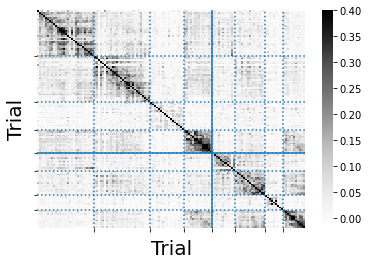

In [342]:
sim = fr_map_one_exp_all_day_restack.corr()
ax=sns.heatmap(sim,vmax=0.4,cmap='Greys')
for dd in day_change:
    ax.axvline(dd,c='C0',linestyle=':')
    ax.axhline(dd,c='C0',linestyle=':')
for dd in novel_change:
    ax.axvline(dd,c='C0',linestyle='-')
    ax.axhline(dd,c='C0',linestyle='-')
ax.set_xticks(day_change)
ax.set_yticks(day_change)
ax.set(xlabel='Trial',ylabel='Trial')
savefig = False
if savefig:
    figfn = os.path.join(figdir,f'{region}_exp_{exp}.svg')
    fig.savefig(figfn,bbox_inches='tight')
    figfn = os.path.join(figdir,f'{region}_exp_{exp}.png')
    fig.savefig(figfn,bbox_inches='tight')



In [6]:
def get_beg_and_corr_one_exp_one_famnovel(fr_map_one_exp_all_day_famnovel,n_tr=3):
    '''
    region, exp, day, isnovel, uid, posbin
    '''
    fr_map_one_exp_all_day_famnovel_restack=fr_map_one_exp_all_day_famnovel.unstack(2).swaplevel(0,1,axis=1).sort_index(axis=1).dropna(axis=1,how='all').dropna(axis=0)
    sim = fr_map_one_exp_all_day_famnovel_restack.corr()
    
    day_l=fr_map_one_exp_all_day_famnovel_restack.columns.get_level_values(0)
    day_change = np.nonzero(np.diff(day_l))[0]+1
    
    day_l = sim.columns.get_level_values(0).unique()
    tr_l ={'beg':slice(0,n_tr),'end':slice(-n_tr,None)}
    n_tr = 3
    beg_end_corr = {}
    for d1 in day_l:
        for d2 in day_l:
            for k1,tr1 in tr_l.items():
                for k2,tr2 in tr_l.items():        
    #                 corr=sim.loc[(d1,slice(None)),(d2,slice(None))].iloc[:n_tr,-n_tr:].mean().mean()
                    corr=sim.loc[(d1,slice(None)),(d2,slice(None))].iloc[tr1,tr2].mean().mean()
                    beg_end_corr[d1,d2,k1,k2]=corr

    beg_end_corr = pd.Series(beg_end_corr).unstack(level=1).unstack()
    return beg_end_corr,sim


In [ ]:

X = fr_map_all['fr_map_trial_df_all'].loc[region,:]
# for exp in X.index.get_level_values()

In [7]:
%%time
beg_end_corr_all = {}
sim_all= {}
fr_map_trial_df_all = fr_map_all['fr_map_trial_df_all']
gpb = fr_map_trial_df_all.groupby(level=(0,1,3))
n_tr = 3
for k,val in gpb:
    beg_end_corr,sim_one=get_beg_and_corr_one_exp_one_famnovel(val,n_tr=n_tr)
    beg_end_corr_all[k] = beg_end_corr
    sim_all[k] = sim_one

beg_end_corr_all = pd.concat(beg_end_corr_all,axis=0)
sim_all = pd.concat(sim_all,axis=0)


CPU times: user 15.8 s, sys: 770 ms, total: 16.6 s
Wall time: 16.6 s


In [379]:
region = 'CA1'
exp = 10
day = slice(None)
isnovel=0

fr_map_one_exp_all_day_famnovel = fr_map_all['fr_map_trial_df_all'].loc[(region,exp,day,isnovel),:]

fr_map_one_exp_all_day_famnovel_restack=fr_map_one_exp_all_day_famnovel.unstack(2).swaplevel(0,1,axis=1).sort_index(axis=1).dropna(axis=1,how='all').dropna(axis=0)

day_l=fr_map_one_exp_all_day_famnovel_restack.columns.get_level_values(0)
day_change = np.nonzero(np.diff(day_l))[0]+1

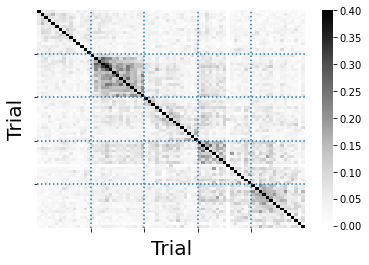

In [380]:
sim = fr_map_one_exp_all_day_famnovel_restack.corr()
ax=sns.heatmap(sim,vmax=0.4,cmap='Greys')
for dd in day_change:
    ax.axvline(dd,c='C0',linestyle=':')
    ax.axhline(dd,c='C0',linestyle=':')
ax.set_xticks(day_change)
ax.set_yticks(day_change)
ax.set(xlabel='Trial',ylabel='Trial')
savefig = True#False
if savefig:
    figfn = os.path.join(figdir,f'{region}_exp_{exp}_{famnovel}.svg')
    fig.savefig(figfn,bbox_inches='tight')
    figfn = os.path.join(figdir,f'{region}_exp_{exp}_{famnovel}.png')
    fig.savefig(figfn,bbox_inches='tight')



In [381]:
day_l = sim.columns.get_level_values(0).unique()
tr_l ={'beg':slice(0,n_tr),'end':slice(-n_tr,None)}
n_tr = 3
beg_end_corr = {}
for d1 in day_l:
    for d2 in day_l:
        for k1,tr1 in tr_l.items():
            for k2,tr2 in tr_l.items():        
#                 corr=sim.loc[(d1,slice(None)),(d2,slice(None))].iloc[:n_tr,-n_tr:].mean().mean()
                corr=sim.loc[(d1,slice(None)),(d2,slice(None))].iloc[tr1,tr2].mean().mean()
                beg_end_corr[d1,d2,k1,k2]=corr

beg_end_corr = pd.Series(beg_end_corr).unstack(level=1).unstack()

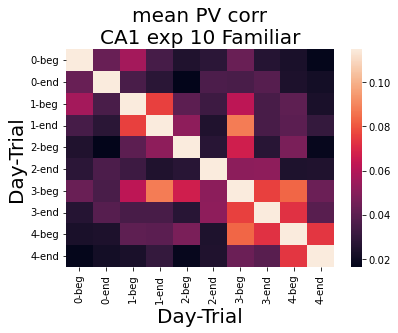

In [382]:
fig,ax=plt.subplots()
# ax=sns.heatmap(beg_end_corr,vmax=0.1)
ax=sns.heatmap(beg_end_corr,vmax=np.quantile(beg_end_corr.values,0.9))
ax.set(xlabel='Day-Trial',ylabel='Day-Trial')
famnovel = {0:'Familiar',1:'Novel'}[isnovel]
ax.set_title(f'mean PV corr\n{region} exp {exp} {famnovel}')
savefig = True#False
if savefig:
    figfn = os.path.join(figdir,f'beg_end_{region}_exp_{exp}_{famnovel}.svg')
    fig.savefig(figfn,bbox_inches='tight')
    figfn = os.path.join(figdir,f'beg_end_{region}_exp_{exp}_{famnovel}.png')
    fig.savefig(figfn,bbox_inches='tight')



In [8]:
def extract_from_beg_end_corr(beg_end_corr):
    across_sess_end_beg =[]
    day_l = beg_end_corr.index.get_level_values(0).unique()
    for day in day_l[:-1]:
        across_sess_end_beg.append(beg_end_corr.loc[(day,'end'),(day+1,'beg')])

    across_sess_beg_end = []
    for day in day_l[:-1]:
        across_sess_beg_end.append(beg_end_corr.loc[(day,'beg'),(day+1,'end')])

    within_sess_beg_end = []
    for day in day_l[:-1]:
        within_sess_beg_end.append(beg_end_corr.loc[(day,'beg'),(day,'end')])

        
    within_sess_within_ep = np.diag(beg_end_corr)
    
    
    summary = {
    'across_day_end_beg':np.array(across_sess_end_beg),
    'across_day_beg_end':np.array(across_sess_beg_end),
    'within_day_beg_end':np.array(within_sess_beg_end),
    'within_day_within_ep':within_sess_within_ep
    }
    
    summary_df = pd.concat({k:pd.Series(val) for k,val in summary.items()})
        
    return summary_df

In [17]:
beg_end_corr_all

0                   1                   2            \
                     beg       end       beg       end       beg       end   
CA1 0  0 0 beg  0.419316  0.061826  0.052702  0.011507  0.012152  0.009599   
           end  0.061826  0.495899  0.051313  0.085845  0.007538  0.004646   
         1 beg  0.052702  0.051313  0.405364  0.022280  0.015544  0.003843   
           end  0.011507  0.085845  0.022280  0.460565  0.025309  0.018509   
         2 beg  0.012152  0.007538  0.015544  0.025309  0.418101  0.028545   
...                  ...       ...       ...       ...       ...       ...   
DG  11 1 2 end  0.037011  0.078791  0.065967  0.074545  0.035632  0.353495   
         3 beg  0.041114  0.095835  0.037991  0.049088  0.015207  0.079191   
           end  0.011530  0.087090  0.039035  0.033726  0.033592  0.033672   
         4 beg  0.051547  0.082160  0.044410  0.052365  0.042796  0.082151   
           end  0.023017  0.063123  0.043102  0.044601  0.045579  0.056396   

                       3                   4            
                     beg       end       beg       end  
CA1 0  0 0 beg  0.074266  0.051712       NaN       NaN  
           end  0.067167  0.038761       NaN       NaN  
         1 beg  0.067874  0.044594       NaN       NaN  
           end  0.038154  0.015670       NaN       NaN  
         2 beg  0.010460  0.013558       NaN       NaN  
...                  ...       ...       ...       ...  
DG  11 1 2 end  0.079191  0.033672  0.082151  0.056396  
         3 beg  0.406278  0.094333  0.094877  0.047573  
           end  0.094333  0.455248  0.064577  0.104764  
         4 beg  0.094877  0.064577  0.397914  0.089163  
           end  0.047573  0.104764  0.089163  0.439745  

[348 rows x 10 columns]

In [9]:
gpb = beg_end_corr_all.groupby(level=(0,1,2))
# summary_all = []
summary_all = {}
for k,beg_end_corr in gpb:
    beg_end_corr = beg_end_corr.loc[k].dropna(axis=1,how='all')
    summary = extract_from_beg_end_corr(beg_end_corr)
#     summary_all.append(summary)
    summary_all[k]=summary
# summary_d = {}
# for k in summary_all[0].keys():
#     summary_d[k] = []
#     for summ in summary_all:
#         summary_d[k].extend(summ[k])
#     summary_d[k] = pd.Series(summary_d[k])
# summary_d = pd.concat(summary_d)
summary_all = pd.concat(summary_all,axis=0)

In [12]:
summary_all.index.get_level_values(0).unique()

Index(['CA1', 'CA3', 'DG'], dtype='object')

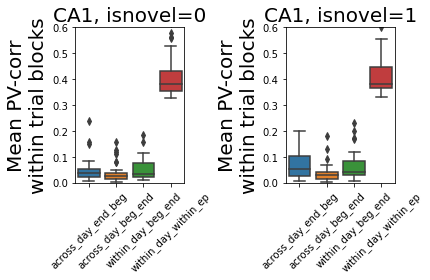

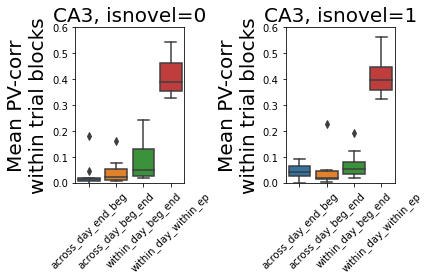

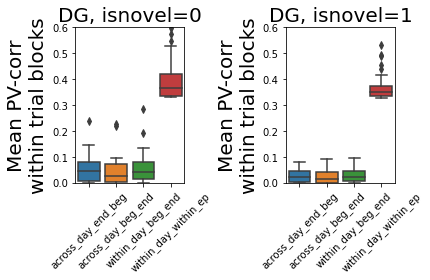

In [16]:
for region in summary_all.index.get_level_values(0).unique():
    fig,axs=plt.subplots(1,2)
    for isnovel in [0,1]:
        ax=axs[isnovel]
        toplot=summary_all.loc[region,slice(None),isnovel].reset_index(level=1)

        ax=sns.boxplot(data=toplot,x='level_1',y=0,ax=ax)
        xticklabels=ax.get_xticklabels()
        ax.set_xticklabels(xticklabels,rotation=45)
        ax.set(xlabel=None)
        ax.set_ylabel('Mean PV-corr\nwithin trial blocks')
        ax.set_title(f'{region}, isnovel={isnovel}')
        ax.set_ylim([0,0.6])
    plt.tight_layout()

In [510]:
aa=summary_all.loc[region,slice(None),isnovel].unstack(level=1)
scipy.stats.ranksums(aa['across_day_end_beg'].dropna(),aa['within_day_beg_end'].dropna())

RanksumsResult(statistic=-0.6348110542727384, pvalue=0.5255516528137947)

In [ ]:
toplot

In [490]:
toplot=summary_d.reset_index(level=0)
pd.boxplot()

AttributeError: module 'pandas' has no attribute 'boxplot'

In [456]:
summary_all

[{'across_end_beg': array([0.05131266, 0.02530852, 0.00587606]),
  'across_sess_beg_end': array([0.01150694, 0.0038427 , 0.01355807]),
  'within_sess_beg_end': array([0.41931583, 0.49589863, 0.40536425, 0.46056469, 0.4181012 ,
         0.37675704, 0.49008998, 0.52993946])},
 {'across_end_beg': array([0.05470489, 0.01948962, 0.005456  ]),
  'across_sess_beg_end': array([0.03786412, 0.00602793, 0.00998967]),
  'within_sess_beg_end': array([0.36898941, 0.39914549, 0.39686906, 0.48054224, 0.37199687,
         0.35632763, 0.46032364, 0.43334696])},
 {'across_end_beg': array([0.04705505]),
  'across_sess_beg_end': array([0.04882799]),
  'within_sess_beg_end': array([0.46259948, 0.48181271, 0.43197783, 0.5611861 ])},
 {'across_end_beg': array([0.10180567]),
  'across_sess_beg_end': array([0.00296711]),
  'within_sess_beg_end': array([0.50153314, 0.46819323, 0.51827607, 0.40214299])},
 {'across_end_beg': array([0.04089805]),
  'across_sess_beg_end': array([0.00425055]),
  'within_sess_beg_end'

In [ ]:
summary = extract_from_beg_end_corr(beg_end_corr)

In [276]:
across_sess_end_beg =[]
for day in day_l[:-1]:
    across_sess_end_beg.append(beg_end_corr.loc[(day,'end'),(day+1,'beg')])

across_sess_beg_end = []
for day in day_l[:-1]:
    across_sess_beg_end.append(beg_end_corr.loc[(day,'beg'),(day+1,'end')])



In [277]:
within_sess_beg_end = np.diag(beg_end_corr)


In [278]:
across_sess_end_beg

[0.05131265605786806, 0.025308519552212225, 0.0058760584580502895]

In [279]:
across_sess_beg_end

[0.011506944716291321, 0.0038426960334731687, 0.013558065332702582]

In [243]:
sim.loc[(d1,sl1),(d2,sl2)]

Empty DataFrame
Columns: []
Index: []

In [241]:
sim.loc[(d1,slice(None)),(d2,slice(None))]

3                                                              \
            0         1         2         3         4         5         6    
3 0   1.000000  0.332045  0.145015  0.066516  0.198810  0.149262  0.163243   
  1   0.332045  1.000000  0.228346  0.225211  0.104104  0.348080  0.302758   
  2   0.145015  0.228346  1.000000  0.119638  0.069327  0.354103  0.279992   
  3   0.066516  0.225211  0.119638  1.000000  0.187692  0.233451  0.332266   
  4   0.198810  0.104104  0.069327  0.187692  1.000000  0.168441  0.198487   
  5   0.149262  0.348080  0.354103  0.233451  0.168441  1.000000  0.473882   
  6   0.163243  0.302758  0.279992  0.332266  0.198487  0.473882  1.000000   
  7   0.105404  0.161150  0.174156  0.262990  0.110395  0.296006  0.320680   
  8   0.097335  0.199596  0.198094  0.332595  0.160937  0.347423  0.345247   
  9   0.093833  0.119791  0.156692  0.234402  0.273780  0.273230  0.258514   
  10  0.091745  0.153687  0.177198  0.103017  0.125541  0.255856  0.222829   
  11  0.071365  0.120985  0.179348  0.169060  0.185545  0.240457  0.227699   
  12  0.139733  0.162262  0.152443  0.197582  0.134864  0.226143  0.272480   
  13  0.070866  0.164483  0.102205  0.160418  0.179834  0.136460  0.132847   

                                                                            
            7         8         9         10        11        12        13  
3 0   0.105404  0.097335  0.093833  0.091745  0.071365  0.139733  0.070866  
  1   0.161150  0.199596  0.119791  0.153687  0.120985  0.162262  0.164483  
  2   0.174156  0.198094  0.156692  0.177198  0.179348  0.152443  0.102205  
  3   0.262990  0.332595  0.234402  0.103017  0.169060  0.197582  0.160418  
  4   0.110395  0.160937  0.273780  0.125541  0.185545  0.134864  0.179834  
  5   0.296006  0.347423  0.273230  0.255856  0.240457  0.226143  0.136460  
  6   0.320680  0.345247  0.258514  0.222829  0.227699  0.272480  0.132847  
  7   1.000000  0.374852  0.289277  0.237029  0.258644  0.257324  0.159380  
  8   0.374852  1.000000  0.307671  0.242084  0.286814  0.309548  0.156028  
  9   0.289277  0.307671  1.000000  0.388028  0.452516  0.331387  0.263557  
  10  0.237029  0.242084  0.388028  1.000000  0.514894  0.335820  0.242058  
  11  0.258644  0.286814  0.452516  0.514894  1.000000  0.354529  0.298524  
  12  0.257324  0.309548  0.331387  0.335820  0.354529  1.000000  0.231674  
  13  0.159380  0.156028  0.263557  0.242058  0.298524  0.231674  1.000000

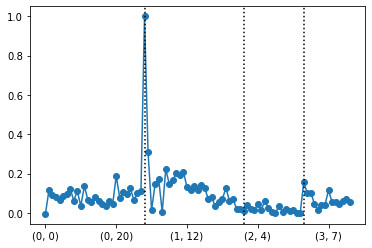

In [99]:
ax=sim.loc[1,0].plot(marker='o')
for dc in day_change:
    ax.axvline(dc,color='k',linestyle=':')
# ax.set_ylim([0,0.4])

In [555]:
# fr_map_all_mask = copy.copy(fr_map_all)

In [579]:
# fr_map_all = copy.copy(fr_map_all_nomask)
fr_map_all = copy.copy(fr_map_all_mask)

In [577]:
reload(database)

<module 'database' from '/mnt/home/szheng/projects/util_code/database.py'>

In [687]:
region = 'CA3'
exp = 0
day = slice(None)
uid = 0

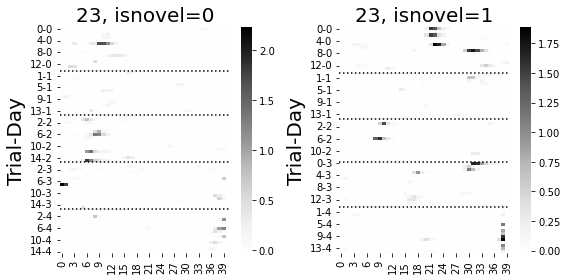

In [711]:

fig,axs=plt.subplots(1,2,figsize=(8,4))
for jj,isnovel in enumerate([0,1]):
    fr_map_one_exp_all_day_famnovel_one_neuron = fr_map_all['fr_map_trial_df_all'].loc[(region,exp,day,isnovel,uid),:]

    fr_map_one_exp_all_day_famnovel_one_neuron_unstack=fr_map_one_exp_all_day_famnovel_one_neuron.unstack(level=2).dropna(axis=1,how='all')

    cols=fr_map_one_exp_all_day_famnovel_one_neuron_unstack.columns.sortlevel(level=1)[0]
    fr_map_one_exp_all_day_famnovel_one_neuron_unstack = fr_map_one_exp_all_day_famnovel_one_neuron_unstack.loc[:,cols].reset_index(drop=True)


    day_l=fr_map_one_exp_all_day_famnovel_one_neuron_unstack.columns.get_level_values(1)
    day_change = np.nonzero(np.diff(day_l))[0]+1
    
    ax=axs[jj]
    ax=sns.heatmap(fr_map_one_exp_all_day_famnovel_one_neuron_unstack.T,cmap='Greys',ax=ax)
    for dd in day_change:
        ax.axhline(dd,color='k',linestyle=':')
    ax.set_title(f'{uid}, isnovel={isnovel}')
    ax.set(ylabel='Trial-Day')
plt.tight_layout()
uid+=1
    

In [86]:
uid=0
fr_map_one_exp_all_day_famnovel_one_neuron = fr_map_all['fr_map_trial_df_all'].loc[(region,exp,day,isnovel,uid),:]

fr_map_one_exp_all_day_famnovel_one_neuron_unstack=fr_map_one_exp_all_day_famnovel_one_neuron.unstack(level=2).dropna(axis=1,how='all')
cols=fr_map_one_exp_all_day_famnovel_one_neuron_unstack.columns.sortlevel(level=1)[0]
fr_map_one_exp_all_day_famnovel_one_neuron_unstack = fr_map_one_exp_all_day_famnovel_one_neuron_unstack.loc[:,cols].reset_index(drop=True)

# try nmf on (neuron x pos) x all trial

In [ ]:
region = 'CA1'
exp = 0
day = slice(None)
isnovel=0

fr_map_one_exp_all_day_famnovel = fr_map_all['fr_map_trial_df_all'].loc[(region,exp,day,isnovel),:]

fr_map_one_exp_all_day_famnovel_restack=fr_map_one_exp_all_day_famnovel.unstack(2).swaplevel(0,1,axis=1).sort_index(axis=1).dropna(axis=1,how='all').dropna(axis=0)

day_l=fr_map_one_exp_all_day_famnovel_restack.columns.get_level_values(0)
day_change = np.nonzero(np.diff(day_l))[0]+1

active_thresh = 0.3
fr_active=fr_map_one_exp_all_day_famnovel > active_thresh
n_active_thresh=4.
ma=(fr_active.sum(axis=1).unstack(level=-1)>n_active_thresh).any(axis=1)
ma = ma.groupby(level=4).any()
# inds = ma.index
inds = ma.loc[ma].index



In [181]:
X_df = fr_map_one_exp_all_day_famnovel_restack.loc[(slice(None),slice(None),slice(None),inds),:]
X = X_df.values
X[X<0] = 0.

In [200]:
# from sklearn.decomposition import NMF
reload(na)

<module 'nmf_analysis' from '/mnt/home/szheng/projects/nmf_analysis/nmf_analysis.py'>

In [201]:
k=5
W,H_sorted,X_recon, error_ratio = na.nmf_and_sort_h(X_df,k,model=None)

0                                                              \
         0         1         2         3         4         5         6    
0  0.081624  0.336173  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.353253  0.677310  0.480430  0.161325  0.859531  1.199888  0.235470   
2  0.000000  0.803229  0.256212  0.314240  0.588109  0.406612  1.183807   
3  0.000000  0.023848  0.079242  0.078276  0.000000  0.049362  0.000000   
4  0.038452  0.569535  0.222665  0.156471  0.163249  0.163865  0.080878   

                                 ...         3                                \
         7         8         9   ...        4         5         6         7    
0  0.080748  0.000000  0.031025  ...  0.021062  0.140261  0.000000  0.000000   
1  0.841372  1.819165  0.339552  ...  0.000000  0.000000  0.000000  0.021335   
2  1.874906  0.000000  0.565212  ...  0.012252  0.000000  0.000000  0.000000   
3  0.000000  0.205825  0.094724  ...  0.051443  0.000000  0.000000  0.027398   
4  0.213327  0.085445  0.339305  ...  0.505532  2.004861  1.646203  1.282321   

                                                               
         8         9         10        11        12        13  
0  0.000000  0.008293  0.000000  0.000000  0.089050  0.000000  
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.018618  
2  0.000000  0.000000  0.000000  0.000000  0.069065  0.116225  
3  0.000000  0.035367  0.022199  0.025484  0.095912  0.018139  
4  1.081357  1.228563  1.131520  1.119312  1.200127  0.941426  

[5 rows x 87 columns]

<Axes: xlabel='None-None'>

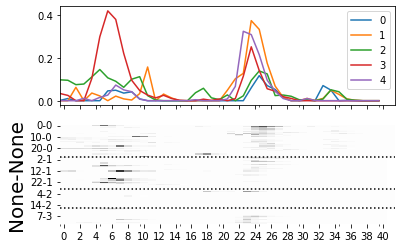

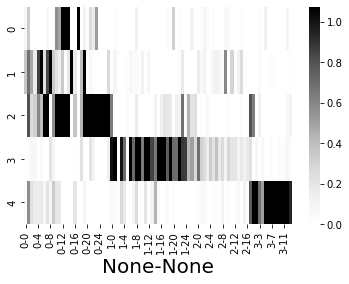

In [220]:
uid = 1
fig,axs=plt.subplots(2,1,sharex=True)
ax=axs[0]
W.loc[(region,exp,isnovel,uid),:].plot(ax=ax)

fr_map_one_exp_all_day_famnovel_one_neuron = fr_map_all['fr_map_trial_df_all'].loc[(region,exp,day,isnovel,uid),:]
fr_map_one_exp_all_day_famnovel_one_neuron_unstack=fr_map_one_exp_all_day_famnovel_one_neuron.unstack(level=2).dropna(axis=1,how='all')
cols=fr_map_one_exp_all_day_famnovel_one_neuron_unstack.columns.sortlevel(level=1)[0]
fr_map_one_exp_all_day_famnovel_one_neuron_unstack = fr_map_one_exp_all_day_famnovel_one_neuron_unstack.loc[:,cols].reset_index(drop=True)
ax=axs[1]
sns.heatmap(fr_map_one_exp_all_day_famnovel_one_neuron_unstack.T,cmap='Greys',cbar=False,ax=ax)

for dd in day_change:
    ax.axhline(dd,color='k',linestyle=':')
plt.figure()
sns.heatmap(H_sorted,cmap='Greys',vmax=np.quantile(H_sorted,0.9))


In [172]:
k=70
W, W_sorted,W_inds, factor_assignment, H_sorted, X_sorted, X_recon_sorted = na.nmf_and_sort(X, k, model=None)

In [183]:
reload(na)
W_df, W_sorted,W_inds, factor_assignment, H_sorted, X_sorted, X_recon_sorted, X_normed_restacked_df=na.nmf_sort_with_position(X_df,k, model=None,do_normalize=False)



# nmf to individual cell

In [221]:
region = 'CA1'
exp = 0
day = slice(None)
isnovel=0

fr_map_one_exp_all_day_famnovel = fr_map_all['fr_map_trial_df_all'].loc[(region,exp,day,isnovel),:]

fr_map_one_exp_all_day_famnovel_restack=fr_map_one_exp_all_day_famnovel.unstack(2).swaplevel(0,1,axis=1).sort_index(axis=1).dropna(axis=1,how='all').dropna(axis=0)

day_l=fr_map_one_exp_all_day_famnovel_restack.columns.get_level_values(0)
day_change = np.nonzero(np.diff(day_l))[0]+1

active_thresh = 0.3
fr_active=fr_map_one_exp_all_day_famnovel > active_thresh
n_active_thresh=4.
ma=(fr_active.sum(axis=1).unstack(level=-1)>n_active_thresh).any(axis=1)
ma = ma.groupby(level=4).any()
# inds = ma.index
inds = ma.loc[ma].index



In [226]:
X_df_all = fr_map_one_exp_all_day_famnovel_restack.loc[(slice(None),slice(None),slice(None),inds),:]

In [228]:
reload(na)

<module 'nmf_analysis' from '/mnt/home/szheng/projects/nmf_analysis/nmf_analysis.py'>

In [229]:
uid=0
X_df=X_df_all.loc[(slice(None),slice(None),slice(None),uid),:]

k=5
W,H_sorted,X_recon, error_ratio = na.nmf_and_sort_h(X_df,k,model=None)
print(error_ratio)

0.5279947406936008


In [234]:
X_df

0                                                    \
                    0         1         2         3         4         5    
CA1 0 0 0 0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          2   0.000000  0.518137  0.000000  0.298388  0.000000  0.207841   
          3   0.000000  0.139210  0.000000  0.036688  0.000000  0.793709   
          4   0.000000  0.000000  0.000000  0.000000  0.000000  0.192142   
          5   0.000000  0.000000  0.000000  0.000000  0.000000  0.006351   
          6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          7   0.327039  0.000000  0.000000  0.000000  0.000000  0.000000   
          8   0.817459  0.000000  0.000000  0.000000  0.000000  0.000000   
          9   0.373987  0.000000  0.000000  0.000000  0.000000  0.000000   
          10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          11  0.000000  0.075208  0.000000  0.000000  0.000000  0.000000   
          12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          13  0.000000  0.022930  0.000000  0.000000  0.000000  0.000000   
          14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          16  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          17  0.000000  0.000000  0.000000  0.000000  0.000000  0.258581   
          18  0.000000  0.000000  0.000000  0.000000  0.000000  0.071200   
          19  0.000000  0.000000  0.000000  0.000000  0.000000  0.300892   
          20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          21  0.000000  0.000000  0.000000  0.000000  0.393661  0.000000   
          22  0.000000  0.000000  0.000000  0.000000  0.008071  0.000000   
          23  0.000000  0.000000  0.000000  0.000000  0.181284  0.000000   
          24  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          25  0.000000  0.000000  0.144302  0.000000  0.000000  0.000000   
          26  0.000000  0.000000  0.098337  0.000000  0.000000  0.000000   
          27  0.000000  0.000000  0.000000  0.000000  0.242997  0.374089   
          28  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          29  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          32  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          33  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          34  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          35  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          36  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          37  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          38  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          39  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          40  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                                                 ...         3            \
                    6         7    8         9   ...        4         5    
CA1 0 0 0 0   0.000000  0.000000  0.0  0.086631  ...  0.000000  0.000000   
          1   0.000000  0.000000  0.0  0.000000  ...  0.000000  0.000000   
          2   0.894436  0.228531  0.0  0.000000  ...  0.000000  1.229577   
          3   1.285966  0.000000  0.0  0.000000  ...  0.000000  0.000000   
          4   0.626415  0.673207  0.0  0.000000  ...  0.000000  0.051048   
          5   0.146857  0.454661  0.0  0.000000  ...  0.671130  0.000000   
          6   0.118717  0.199028  0.0  0.000000  ...  0.440123  0.000000   
          7   0.000000  0.000000  0.0  0.127133  ...  0.553760  0.00

<Axes: xlabel='None-None'>

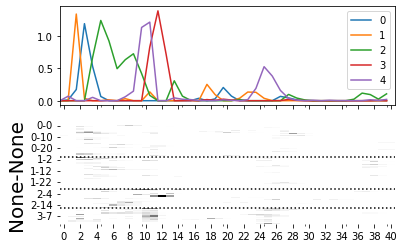

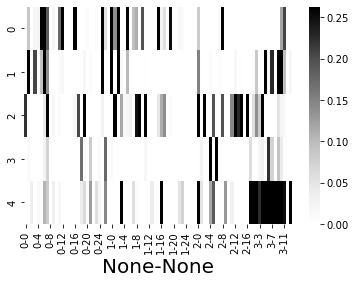

In [235]:
# uid = 1
fig,axs=plt.subplots(2,1,sharex=True)
ax=axs[0]
W.loc[(region,exp,isnovel),:].plot(ax=ax)

# fr_map_one_exp_all_day_famnovel_one_neuron = fr_map_all['fr_map_trial_df_all'].loc[(region,exp,day,isnovel,uid),:]
# fr_map_one_exp_all_day_famnovel_one_neuron_unstack=fr_map_one_exp_all_day_famnovel_one_neuron.unstack(level=2).dropna(axis=1,how='all')
# cols=fr_map_one_exp_all_day_famnovel_one_neuron_unstack.columns.sortlevel(level=1)[0]
# fr_map_one_exp_all_day_famnovel_one_neuron_unstack = fr_map_one_exp_all_day_famnovel_one_neuron_unstack.loc[:,cols].reset_index(drop=True)
toplot = X_df.droplevel(level=(0,1,2,3)).T
ax=axs[1]
sns.heatmap(toplot,cmap='Greys',cbar=False,ax=ax)

for dd in day_change:
    ax.axhline(dd,color='k',linestyle=':')
plt.figure()
sns.heatmap(H_sorted,cmap='Greys',vmax=np.quantile(H_sorted,0.9))


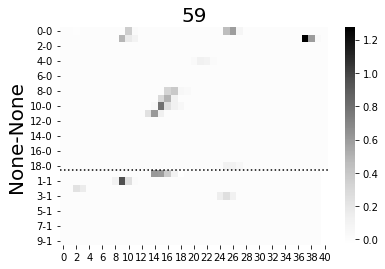

In [210]:


ax=sns.heatmap(fr_map_one_exp_all_day_famnovel_one_neuron_unstack.T,cmap='Greys')
ax.axhline(day_change,color='k',linestyle=':')
ax.set_title(uid)
uid+=1

In [76]:
day_change

array([19])

In [49]:
fr_map_one_exp_all_day_famnovel.loc[(slice(None))]

0         1    2    3    4    5    6    7    8    9   \
CA1 1 0 0 0   0   0.074739  0.051875  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
              1   0.054868  0.273219  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
              2   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
              3   0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
              4   0.234111  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                    ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
      1 0 385 35  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
              36  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
              37  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
              38  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
              39  0.000000  0.218564  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                  ...  24  25  26  27  28  29  30  31  32  33  
CA1 1 0 0 0   0   ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
              1   ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
              2   ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
              3   ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
              4   ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...               ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
      1 0 385 35  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
              36  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
              37  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
              38  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
              39  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[31266 rows x 34 columns]